In [29]:
import pandas as pd
import seaborn as sns
import missingno as msno
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

data = pd.read_csv(r"C:\Users\Erdil\Desktop\DataSet\winequality-red.csv")
df = data.copy()

In [30]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [33]:
# Checking for Missing Values
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [34]:
df.shape

(1599, 12)

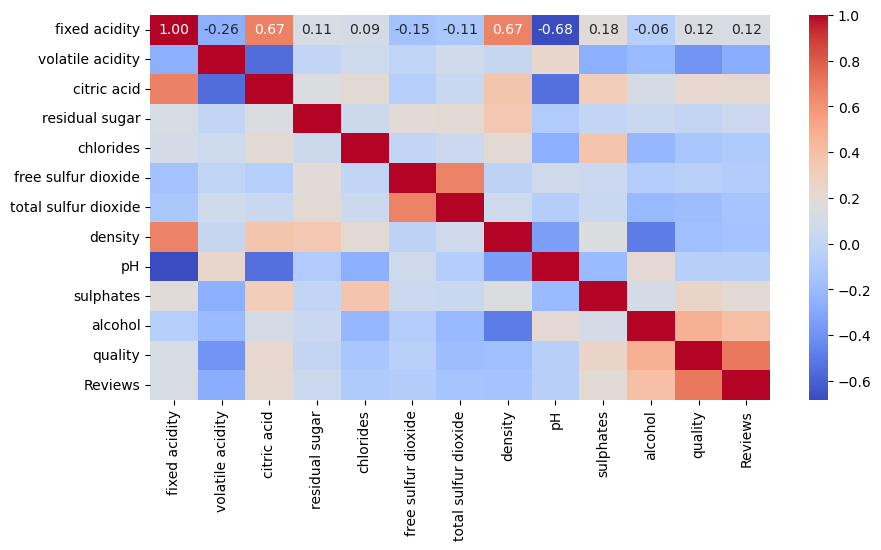

In [48]:
# Computing the Correlation Matrix for Numerical Data
corr = df.corr()

# Correlation Heatmap
plt.figure(figsize=(10, 5))
sb.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

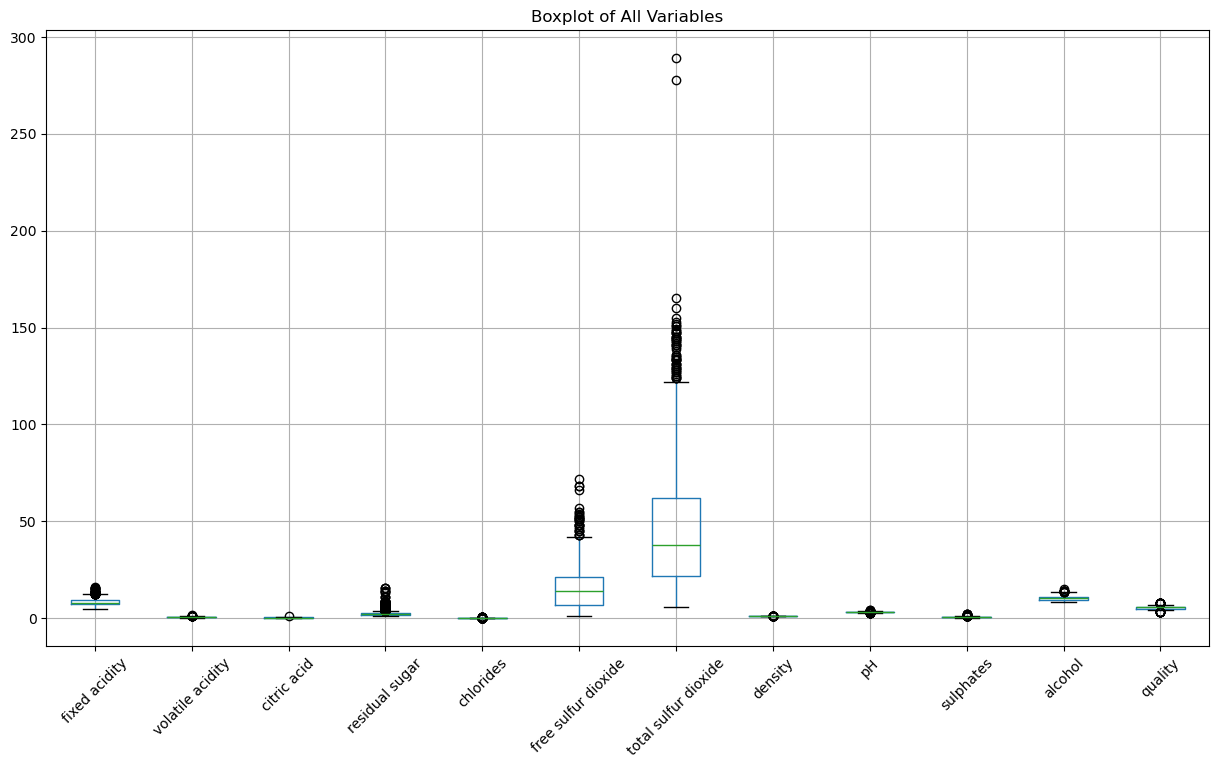

In [51]:
# Creating Boxplots for All Variables
plt.figure(figsize=(15, 8))
df.boxplot()
plt.title('Boxplot of All Variables')
plt.xticks(rotation=45)
plt.show()

In [37]:
# Detecting Outliers in Free Sulfur Dioxide Using the IQR Method
Q1_free = df['free sulfur dioxide'].quantile(0.25)
Q3_free = df['free sulfur dioxide'].quantile(0.75)
IQR_free = Q3_free - Q1_free

# Detecting Outliers
outliers_free = df[(df['free sulfur dioxide'] < (Q1_free - 1.5 * IQR_free)) | (df['free sulfur dioxide'] > (Q3_free + 1.5 * IQR_free))]

# Detecting Outliers for Total Sulfur Dioxide using the IQR Method
Q1_total = df['total sulfur dioxide'].quantile(0.25)
Q3_total = df['total sulfur dioxide'].quantile(0.75)
IQR_total = Q3_total - Q1_total

# Detecting Outliers
outliers_total = df[(df['total sulfur dioxide'] < (Q1_total - 1.5 * IQR_total)) | (df['total sulfur dioxide'] > (Q3_total + 1.5 * IQR_total))]

# Displaying Outlier Rows for Both Columns
outlier_rows = pd.concat([outliers_free, outliers_total]).drop_duplicates()

outlier_rows


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
57,7.5,0.630,0.12,5.1,0.111,50.0,110.0,0.99830,3.26,0.77,9.4,5
396,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5
497,7.2,0.340,0.32,2.5,0.090,43.0,113.0,0.99660,3.32,0.79,11.1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1081,7.9,0.300,0.68,8.3,0.050,37.5,289.0,0.99316,3.01,0.51,12.3,7
1400,7.9,0.690,0.21,2.1,0.080,33.0,141.0,0.99620,3.25,0.51,9.9,5
1419,7.7,0.640,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5
1493,7.7,0.540,0.26,1.9,0.089,23.0,147.0,0.99636,3.26,0.59,9.7,5


In [38]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

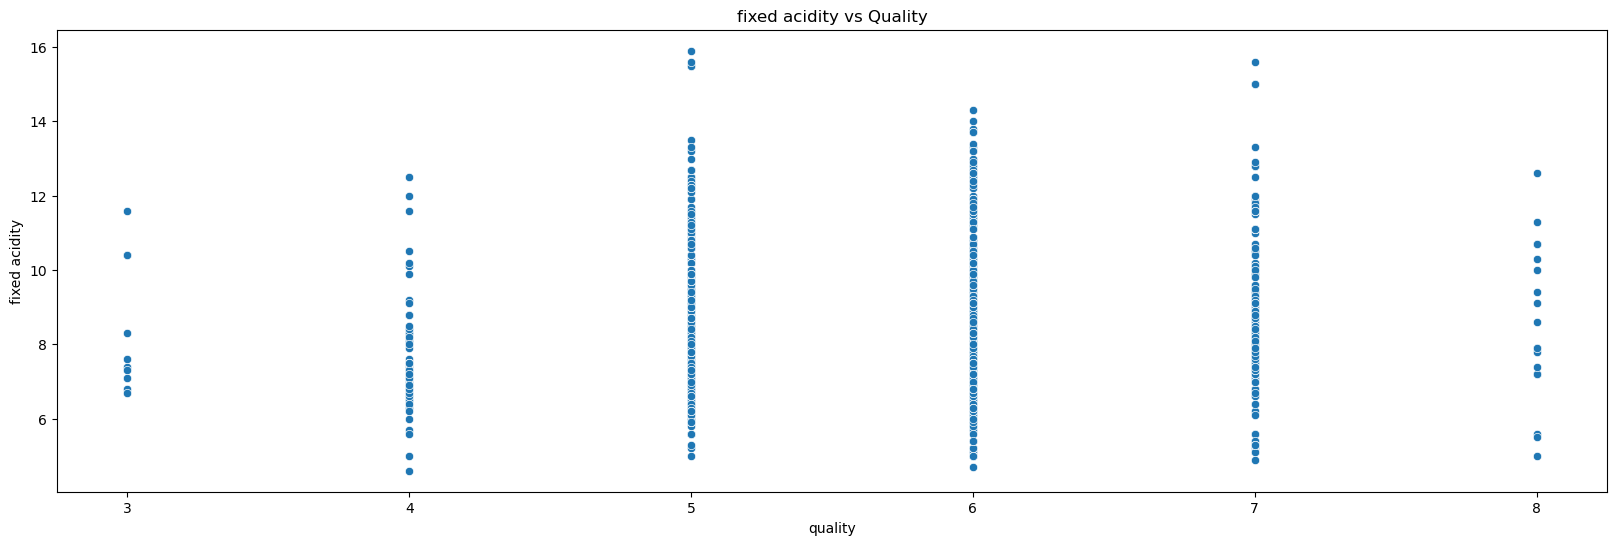

<Figure size 640x480 with 0 Axes>

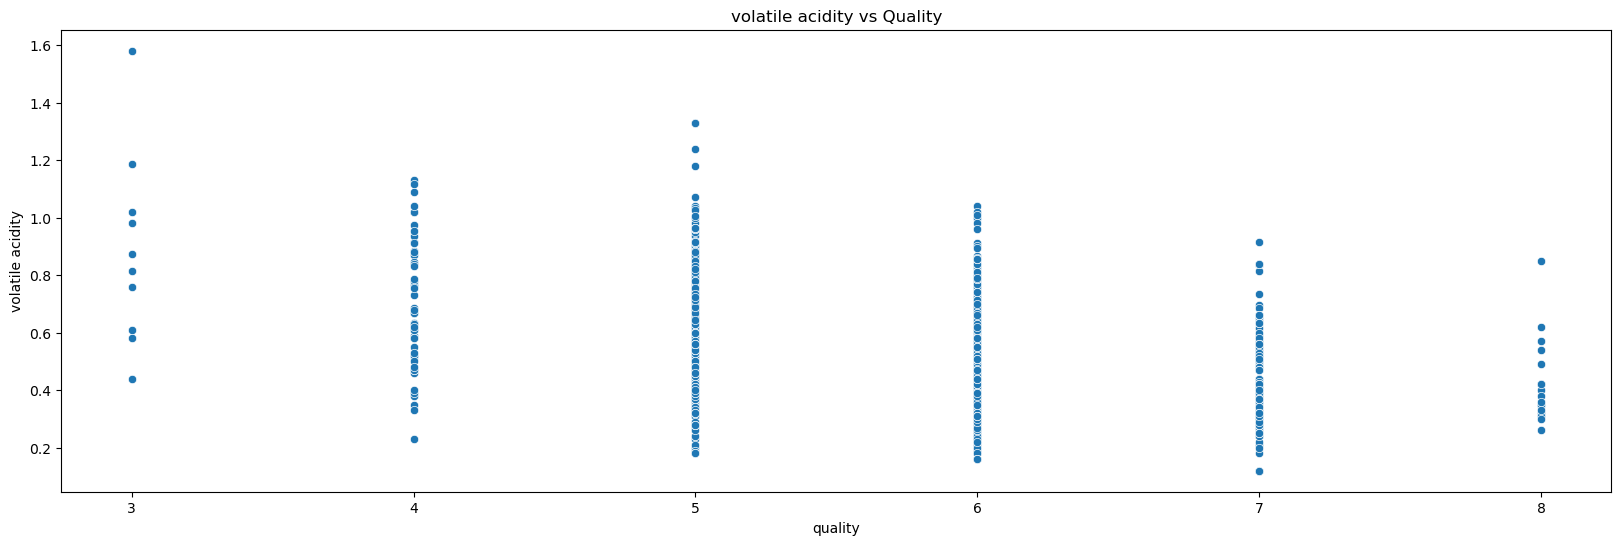

<Figure size 640x480 with 0 Axes>

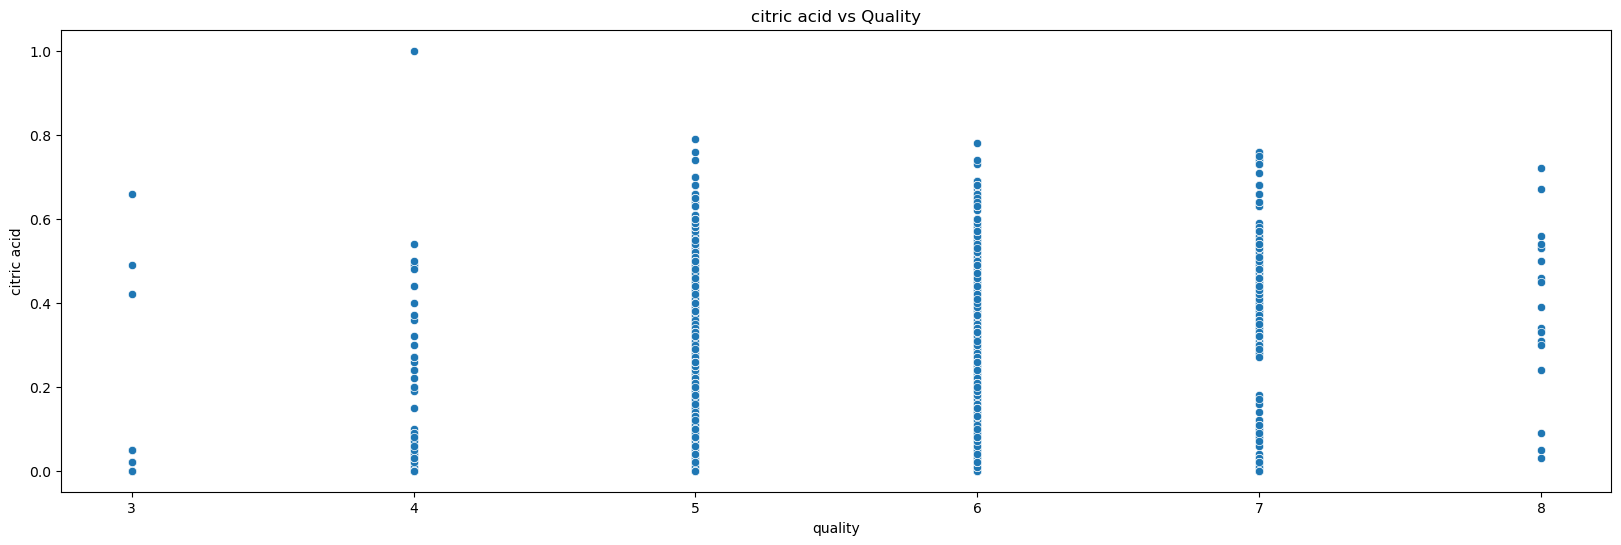

<Figure size 640x480 with 0 Axes>

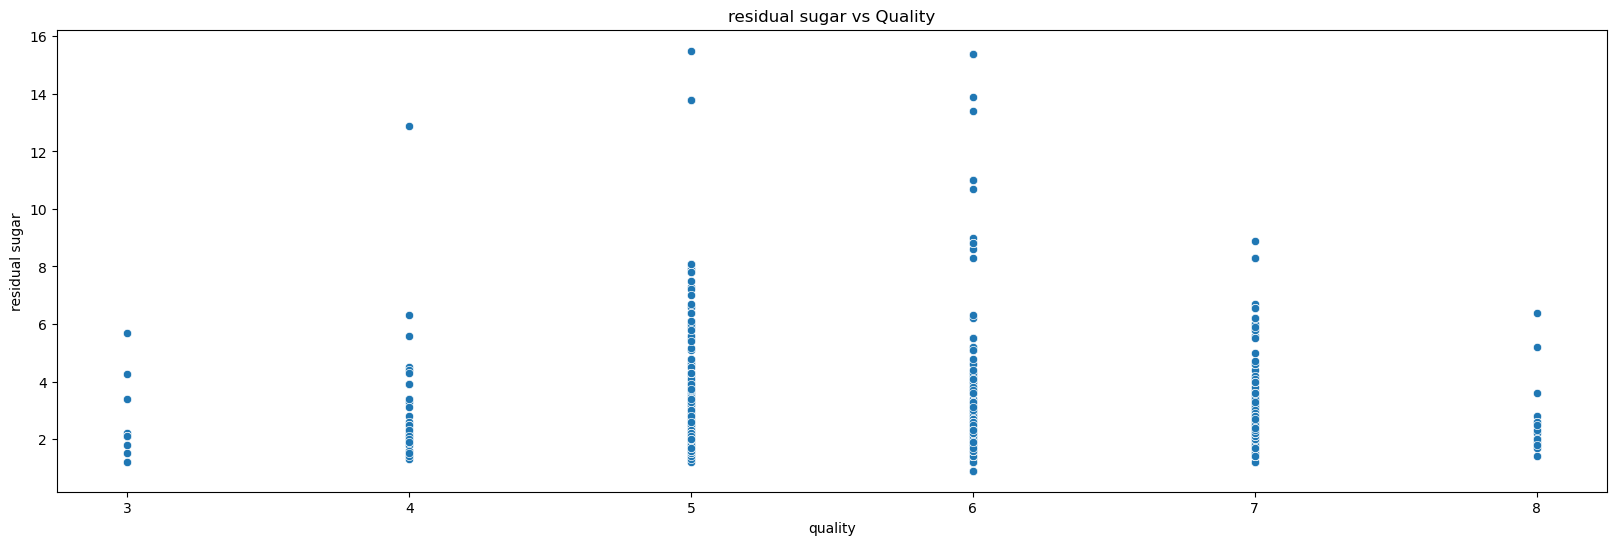

<Figure size 640x480 with 0 Axes>

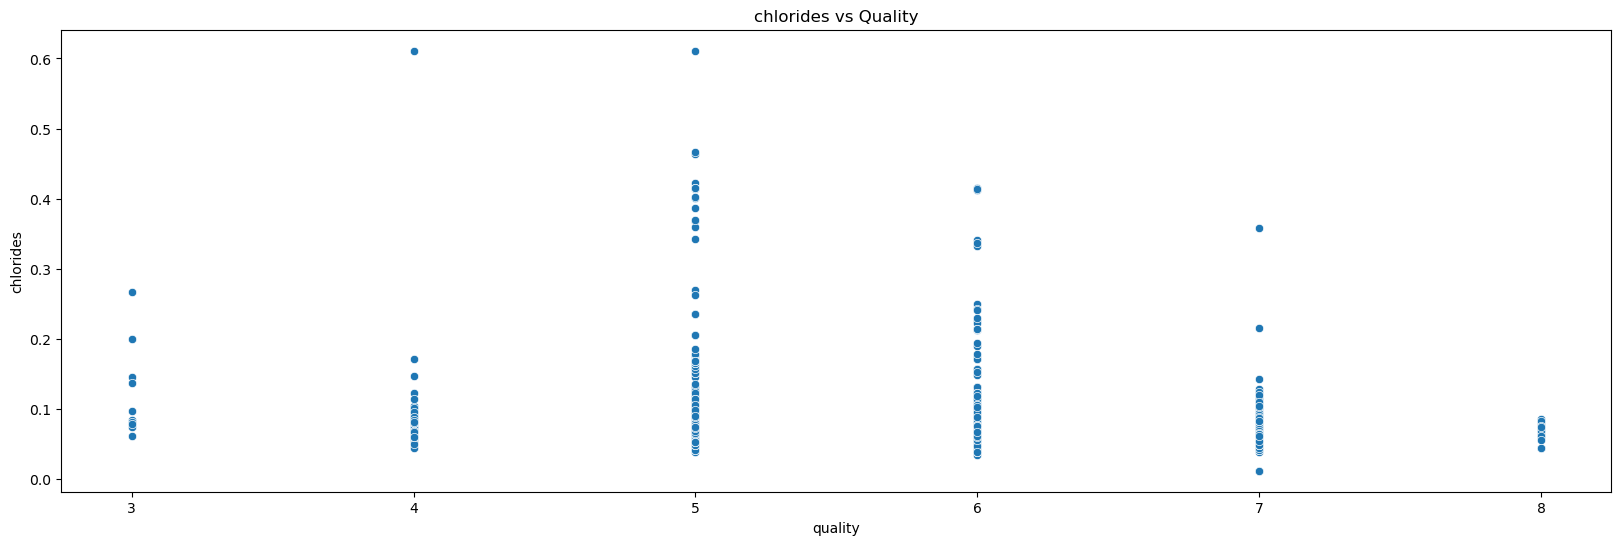

<Figure size 640x480 with 0 Axes>

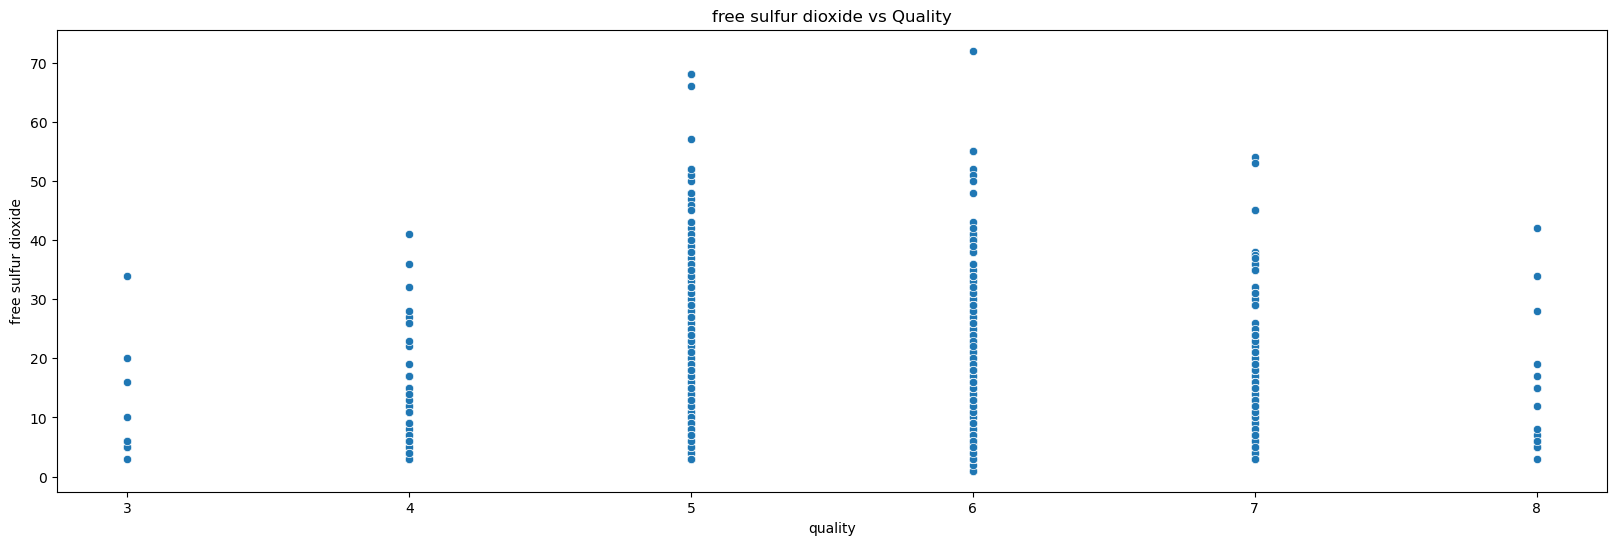

<Figure size 640x480 with 0 Axes>

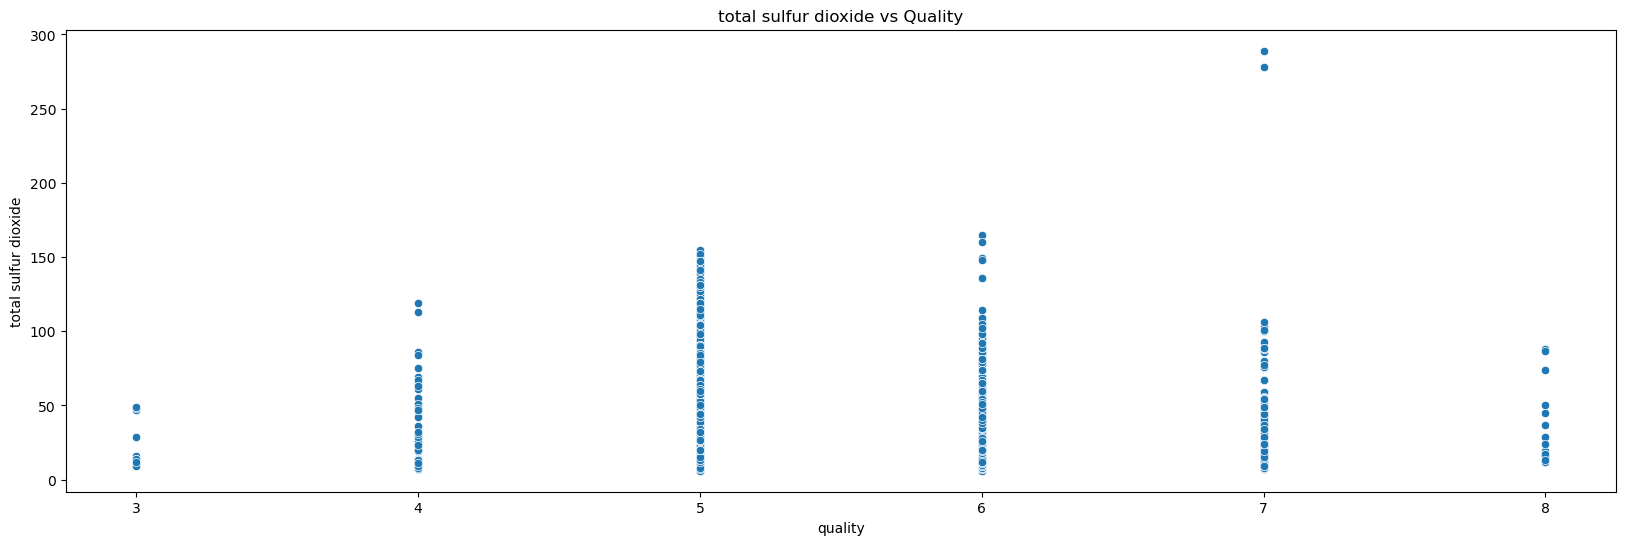

<Figure size 640x480 with 0 Axes>

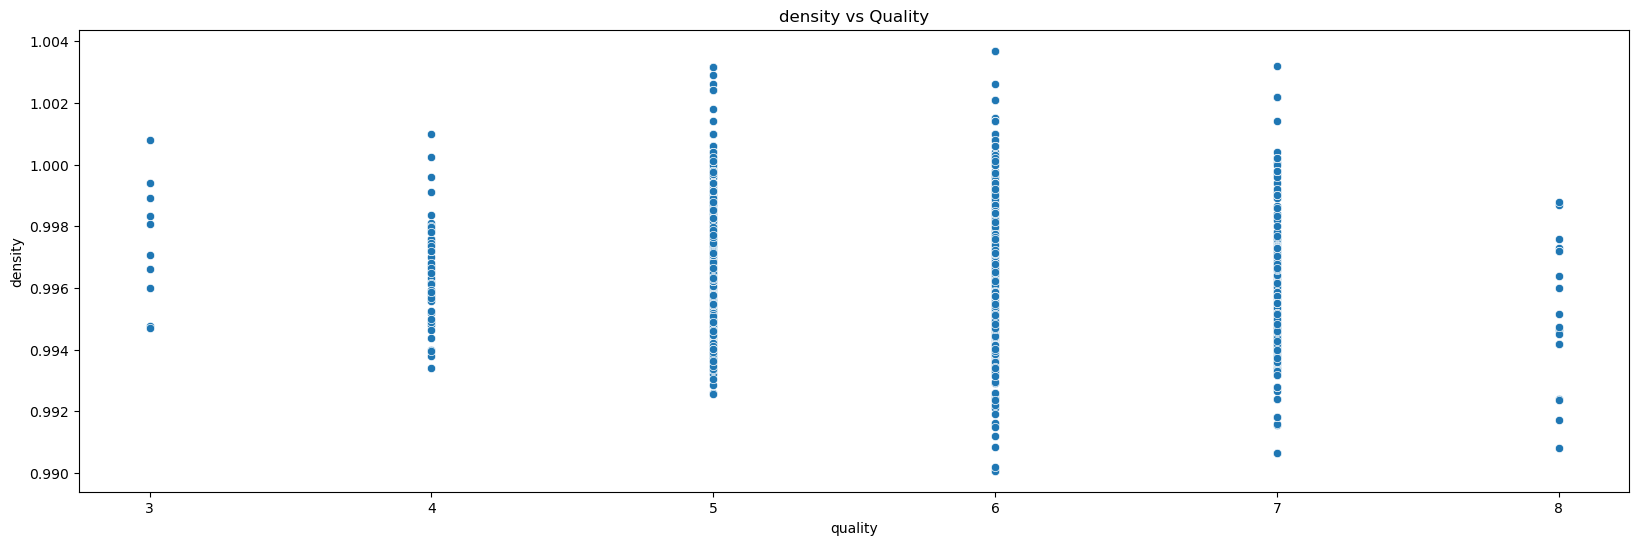

<Figure size 640x480 with 0 Axes>

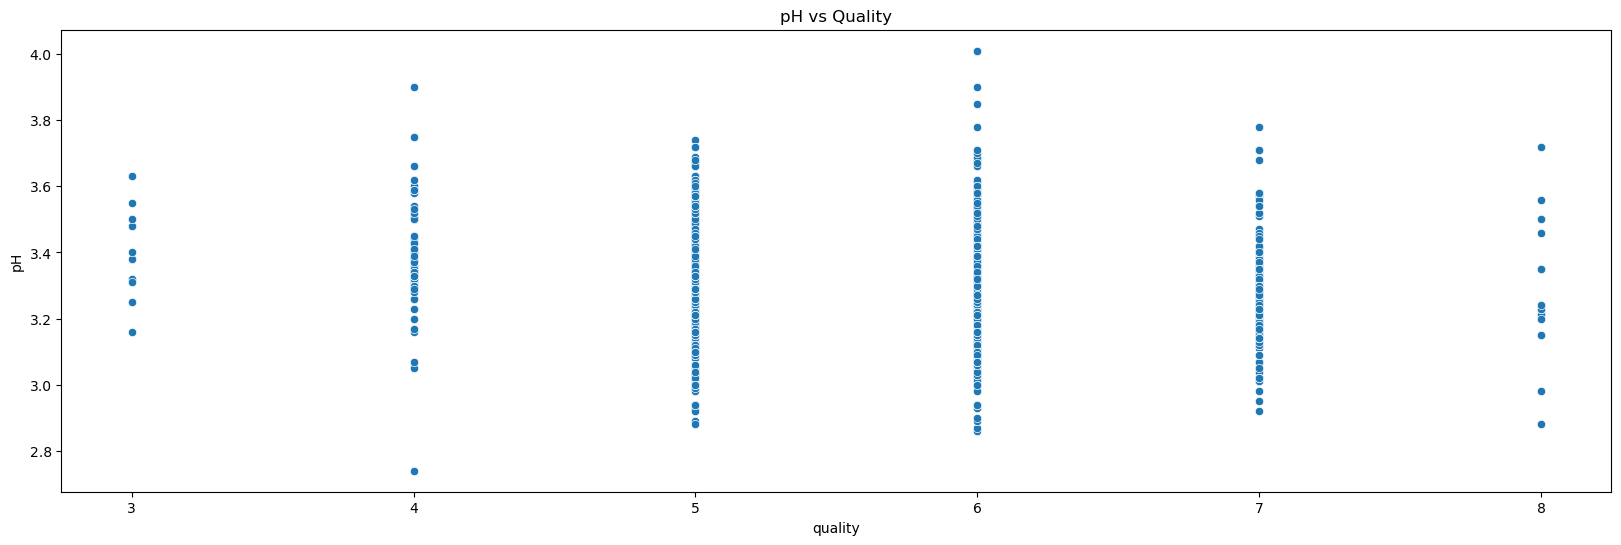

<Figure size 640x480 with 0 Axes>

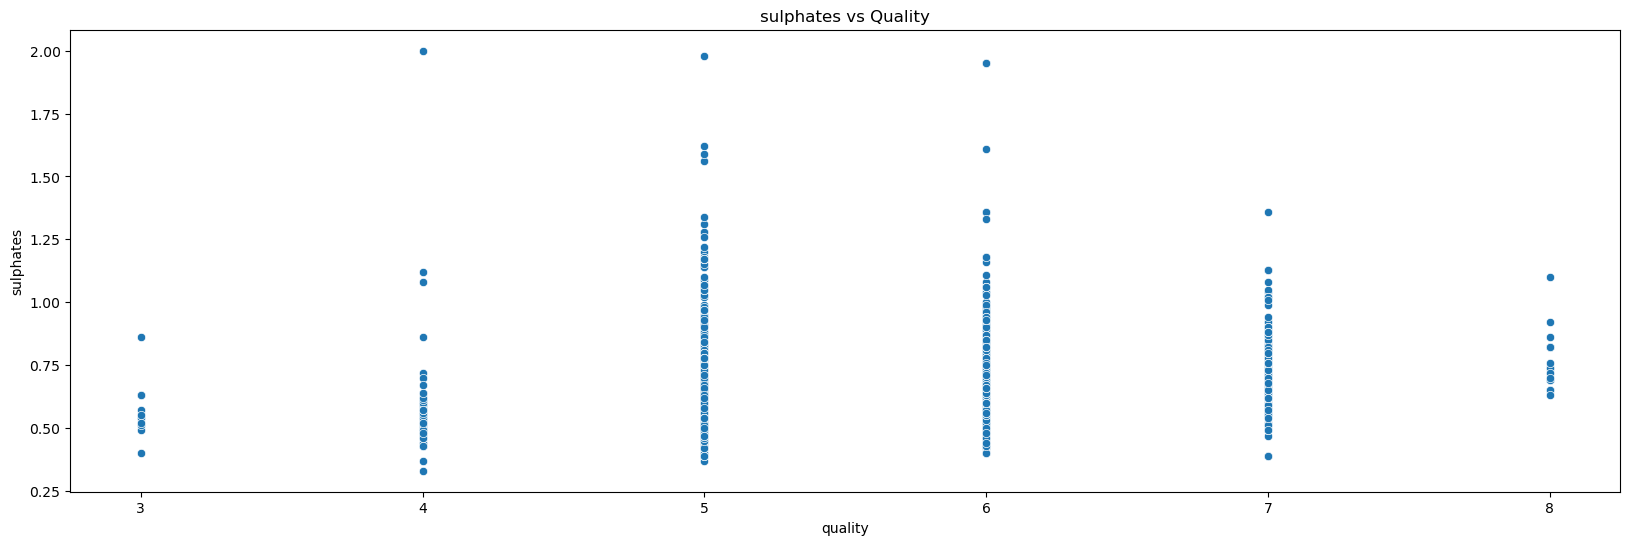

<Figure size 640x480 with 0 Axes>

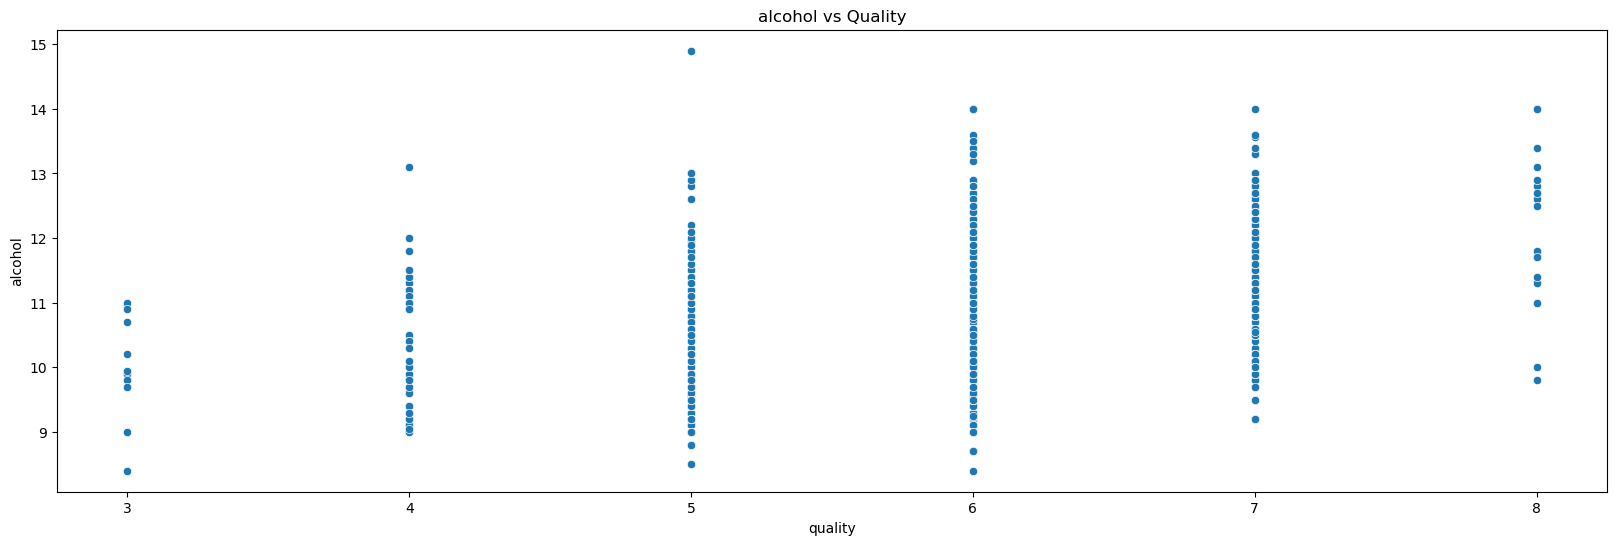

<Figure size 640x480 with 0 Axes>

In [54]:
# Get the List of Features
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

for feature in features:
    plt.figure(figsize=(20, 6))
    sns.scatterplot(x='quality', y=feature, data=df) 
    plt.title(f'{feature} vs Quality')
    plt.show()

In [40]:
# Split Quality Values into Two Categories
df['Reviews'] = df['quality'].apply(lambda x: '0' if x <= 6.5 else '1')

In [41]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Reviews
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [42]:
Counter(df['Reviews'])

Counter({'0': 1382, '1': 217})

In [43]:
# Split features and target variable
# 'x' contains the feature columns (first 11 columns), 
# 'y' contains the target variable 'Reviews'
x = df.iloc[:, :11]
y = df['Reviews']

In [44]:
x.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


In [45]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    0
Name: Reviews, dtype: object

In [46]:
# Separate features and target variable
X = df.drop(['quality', 'Reviews'], axis=1)  # Özellikler
y = df['Reviews']  # Etiketler

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)  # SMOTE kullanılmadan eğitildi

# Make predictions with the test data
y_pred = model.predict(X_test)

# Evaluate the results
print("\nClassification Report:")
class_report = classification_report(y_test, y_pred)
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       413
           1       0.62      0.49      0.55        67

    accuracy                           0.89       480
   macro avg       0.77      0.72      0.74       480
weighted avg       0.88      0.89      0.88       480



In [47]:
# Test data: A DataFrame containing both good and bad quality wines
test_wines = pd.DataFrame({
    'fixed acidity': [
        9.2, 8.7, 8.5, 7.4, 9.5, 8.8, 6.8, 7.9, 8.6, 7.5, 9.0, 8.6, 8.9, 7.3, 8.7, 7.6, 9.3, 7.8, 9.1, 7.5
    ],
    'volatile acidity': [
        0.35, 0.31, 0.30, 0.70, 0.28, 0.32, 0.50, 0.55, 0.33, 0.63, 0.29, 0.32, 0.30, 0.68, 0.31, 0.72, 0.27, 0.70, 0.34, 0.77
    ],
    'citric acid': [
        0.45, 0.47, 0.50, 0.00, 0.55, 0.48, 0.03, 0.05, 0.49, 0.08, 0.50, 0.47, 0.46, 0.04, 0.52, 0.07, 0.53, 0.06, 0.48, 0.05
    ],
    'residual sugar': [
        2.8, 2.9, 2.5, 1.9, 3.0, 2.7, 1.8, 2.0, 2.8, 1.8, 2.6, 2.4, 2.7, 1.6, 2.9, 1.9, 3.1, 2.1, 2.4, 2.0
    ],
    'chlorides': [
        0.065, 0.064, 0.060, 0.076, 0.062, 0.063, 0.070, 0.078, 0.067, 0.077, 0.061, 0.065, 0.061, 0.068, 0.064, 0.080, 0.062, 0.074, 0.060, 0.075
    ],
    'free sulfur dioxide': [
        25.0, 23.0, 20.0, 11.0, 22.0, 24.0, 10.0, 12.0, 21.0, 14.0, 21.0, 26.0, 25.0, 11.0, 22.0, 13.0, 21.0, 18.0, 26.0, 12.0
    ],
    'total sulfur dioxide': [
        65.0, 64.0, 60.0, 34.0, 62.0, 63.0, 30.0, 40.0, 61.0, 38.0, 58.0, 66.0, 62.0, 35.0, 61.0, 45.0, 60.0, 50.0, 66.0, 48.0
    ],
    'density': [
        0.9970, 0.9968, 0.9965, 0.9978, 0.9967, 0.9966, 0.9970, 0.9973, 0.9965, 0.9974, 0.9966, 0.9969, 0.9970, 0.9975, 0.9968, 0.9980, 0.9967, 0.9981, 0.9971, 0.9975
    ],
    'pH': [
        3.35, 3.32, 3.40, 3.51, 3.38, 3.36, 3.30, 3.32, 3.34, 3.29, 3.36, 3.31, 3.37, 3.31, 3.39, 3.30, 3.32, 3.33, 3.35, 3.37
    ],
    'sulphates': [
        0.75, 0.71, 0.70, 0.56, 0.73, 0.74, 0.55, 0.57, 0.72, 0.58, 0.74, 0.61, 0.70, 0.59, 0.72, 0.58, 0.70, 0.60, 0.72, 0.56
    ],
    'alcohol': [
        11.8, 11.9, 11.5, 9.4, 12.0, 11.7, 9.8, 9.6, 11.6, 10.1, 12.1, 10.0, 11.9, 10.3, 12.2, 10.0, 12.1, 9.9, 12.2, 10.2
    ]
})

# Özelliklerin ölçeklenmesi
test_wines_scaled = scaler.transform(test_wines)

# Tahmin yapma
quality_predictions = model.predict(test_wines_scaled)

# Tahminlerin yazdırılması
for i, pred in enumerate(quality_predictions):
    print(f"Wine {i+1} Predicted Quality: {pred}")


Wine 1 Predicted Quality: 1
Wine 2 Predicted Quality: 0
Wine 3 Predicted Quality: 0
Wine 4 Predicted Quality: 0
Wine 5 Predicted Quality: 0
Wine 6 Predicted Quality: 0
Wine 7 Predicted Quality: 0
Wine 8 Predicted Quality: 0
Wine 9 Predicted Quality: 0
Wine 10 Predicted Quality: 0
Wine 11 Predicted Quality: 1
Wine 12 Predicted Quality: 0
Wine 13 Predicted Quality: 0
Wine 14 Predicted Quality: 0
Wine 15 Predicted Quality: 0
Wine 16 Predicted Quality: 0
Wine 17 Predicted Quality: 0
Wine 18 Predicted Quality: 0
Wine 19 Predicted Quality: 0
Wine 20 Predicted Quality: 0
